### Summarize outcomes of NODEBNGM

In [1]:
# imports
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import os
import seaborn as sns
import re
import math
from matplotlib.colors import LinearSegmentedColormap

from plot_functions import *

In [2]:
# load folder directory of batch
datasets = [
    # 'miaSim',
    # 'miaSim_noise_0-005',
    # 'miaSim_noise_0-01',
    # 'miaSim_noise_0-02',
    # 'miaSim_noise_0-04',
    # '3DLV',
    # 'VanderPol',
    # 'VanderPol_noise_0-1',
    # 'VanderPol_noise_0-2',
    # 'VanderPol_noise_0-5',
    # 'VanderPol_noise_1'
    'donorA_ALR',
    'donorB_ALR',
    'male_ALR',
    'female_ALR',
    # 'Silverman_all_ALR',
    # 'Silverman_daily_ALR',
    # 'Silverman_hourly_ALR',
    # 'Bucci_ALR',
    # 'BioTIME_study_339_Genus_10',
    # 'BioTIME_study_339_Species_15',
    # 'BioTIME_study_363_Genus_10',
    # 'BioTIME_study_363_Species_15',
    # 'BioTIME_study_39_Genus_10',
    # 'BioTIME_study_39_Species_15',
    # 'BioTIME_study_478_Genus_10',
    # 'BioTIME_study_478_Species_15',
    # 'Ushio'
    ]

output_folder = "NODE_output/"

data_dir_comp = "MScThesis/Python/ALR_transformation/ALR_transformed_data/"
data_dir_absolute = "MScThesis/explore/data/final_datasets/"

# create color map and load color palette for plots
cmap = LinearSegmentedColormap.from_list("white_to_green", ["white", "darkgreen"])
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Step 1: Calculate weighted effects matrix for all runs
weighted effects = (sign(effects)*weights)

In [5]:
for dataset in datasets:
    # dataset = "female_ALR"
    out_dir = output_folder + "out_" + dataset + "_same_basis/"

    # get list of available runs for the given dataset
    runs = []
    for file in [s for s in os.listdir(out_dir) if dataset in s]:
        runs.append(file)

    # specify dimensions of the plot
    n_runs = len(runs)

    # check if runs for these specifications are available
    if n_runs > 0:
        for run in runs:
            out_run = out_dir + run
            
            if os.path.exists(f"{out_run}/effectsMat.csv"):
                # read data files
                df_effects_tmp = pd.read_csv(f"{out_run}/effectsMat.csv", header=[0])
                df_weights_tmp = pd.read_csv(f"{out_run}/weightsMat.csv", header=[0])
                n_taxa = df_effects_tmp.shape[0]

                # # load and save sign of effectsMat
                # df_effects_sign_tmp = np.sign(df_effects_tmp)
                # df_effects_sign_tmp.to_csv(f'{out_run}/effectsMat_sign.csv', index=False)

                # calculate weighted effects
                df_weighted_effects_tmp = df_effects_tmp * df_weights_tmp
                df_weighted_effects_tmp.to_csv(f'{out_run}/weighted_effectsMat.csv', index=False)

# Step 2: Create summary plots containing all plots of all runs for one dataset

## Summarize heatmaps of all interaction matrices

In [5]:
for dataset in datasets:
    # dataset = datasets[1]
    print(dataset)
    Mat = "weighted_effectsMat" # "weighted_effectsMat", "effectsMat"
    # dataset = datasets[1]
    out_dir = output_folder + "out_" + dataset + "/" # "_same_basis/"

    # get list of available runs for the given dataset
    runs = []
    for file in [s for s in os.listdir(out_dir) if dataset in s]:
        m = re.search(r"run(\d{2})", file)
        if m:
            runs.append(m.group(1))

    # specify dimensions of the plot
    n_runs = len(runs)

    # check if runs for these specifications are available
    if n_runs > 0:
        # specify dimensions of the plot
        n_col = 3
        n_row = math.ceil(n_runs/n_col)

        # make plot
        fig, axs = plt.subplots(n_row, n_col)
        # fig.set_figwidth(4*n_col)
        # fig.set_figheight(2*n_row)
        fig.suptitle(f'{dataset}, {Mat}', y=1.0, fontsize = 20)

        y = 0

        for run in runs:
            out_run = out_dir + "out_" + dataset + f"_run{run}"
            # print(out_run)
            
            if os.path.exists(f"{out_run}/{Mat}.csv"):
                # read data files
                df_model_coeffs_tmp = pd.read_csv(f"{out_run}/{Mat}.csv", header=[0])
                n_taxa = df_model_coeffs_tmp.shape[0]
                
                # Decrease the distance between subplots
                fig.tight_layout(pad=1.0, w_pad=0.1, h_pad=0.1)
                
                if n_taxa < 5:
                    fig.set_figwidth(3*n_taxa)
                    fig.set_figheight(2.5* n_taxa)
                else:
                    fig.set_figwidth(2* n_taxa)
                    fig.set_figheight(1.8 * n_taxa)
                
                # make heatmap
                matrix_A = round(df_model_coeffs_tmp,2)
                colnames = df_model_coeffs_tmp.columns
                rec_per = 10
                if Mat == "weightsMat":
                    cmap = LinearSegmentedColormap.from_list("white_to_green", ["white", "darkgreen"])
                    sns.heatmap(matrix_A, annot=True, fmt="", cmap=cmap, vmin=0, ax=axs[int(y/n_col), y%n_col])
                else:
                    sns.heatmap(matrix_A, annot=True, fmt="", cmap="RdBu", center=0, ax=axs[int(y/n_col), y%n_col])
                
                # Setting x and y axis labels to the column names of the data
                if colnames is None and matrix_A.shape[0] == matrix_A.shape[1]:
                    colnames = [f"x{i}" for i in range(1, n_taxa+1)]
                    axs[int(y/n_col), y%n_col].set_xticklabels(colnames)
                    axs[int(y/n_col), y%n_col].set_yticklabels(colnames, rotation=0)
                elif colnames is not None:
                    if max(len(name) for name in colnames) < 6:
                        axs[int(y/n_col), y%n_col].set_xticklabels(colnames)
                    else:
                        axs[int(y/n_col), y%n_col].set_xticklabels(colnames, rotation=90) # rotate if names are long
                    axs[int(y/n_col), y%n_col].set_yticklabels(colnames, rotation=0)
                axs[int(y/n_col), y%n_col].xaxis.tick_top()
                axs[int(y/n_col), y%n_col].xaxis.set_label_position('top')
                axs[int(y/n_col), y%n_col].tick_params(left=False, top=False)
                
                # Ass border around the largest 20% of the values in A
                threshold = np.percentile(abs(matrix_A), (100-rec_per)) # threshold for the top 20% of values
                positions = np.argwhere(abs(matrix_A) >= threshold) # positions of the top 20% of values
                # Add rectangles around the top 20% of values
                for pos in positions:
                    rect = Rectangle((pos[1], pos[0]), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
                    axs[int(y/n_col), y%n_col].add_patch(rect)
                    
                # Add a border around the entire plot
                rect = Rectangle((0, 0), 1, 1, linewidth=2, edgecolor='black', facecolor='none', transform=axs[int(y/n_col), y%n_col].transAxes)
                axs[int(y/n_col), y%n_col].add_patch(rect)

                # add title
                axs[int(y/n_col), y%n_col].set_title(f"run{run}")
                y += 1
        
        # add caption
        fig.text(0.95, -0.02, f'outlined top {rec_per}%', ha='right', va='bottom', fontsize=12, transform=fig.transFigure)


        fig.tight_layout(pad=1.0)
        plt.yticks(rotation=0)

        # save plot
        plt.savefig(f'{out_dir}/summary_{Mat}_heatmap.pdf',
                    bbox_inches='tight', dpi = 300)
        plt.close()

miaSim
miaSim_noise_0-005
miaSim_noise_0-01
miaSim_noise_0-02
miaSim_noise_0-04
3DLV
VanderPol
VanderPol_noise_0-1
VanderPol_noise_0-2
VanderPol_noise_0-5
VanderPol_noise_1


## Summarize all fits in one plot

donorA_ALR


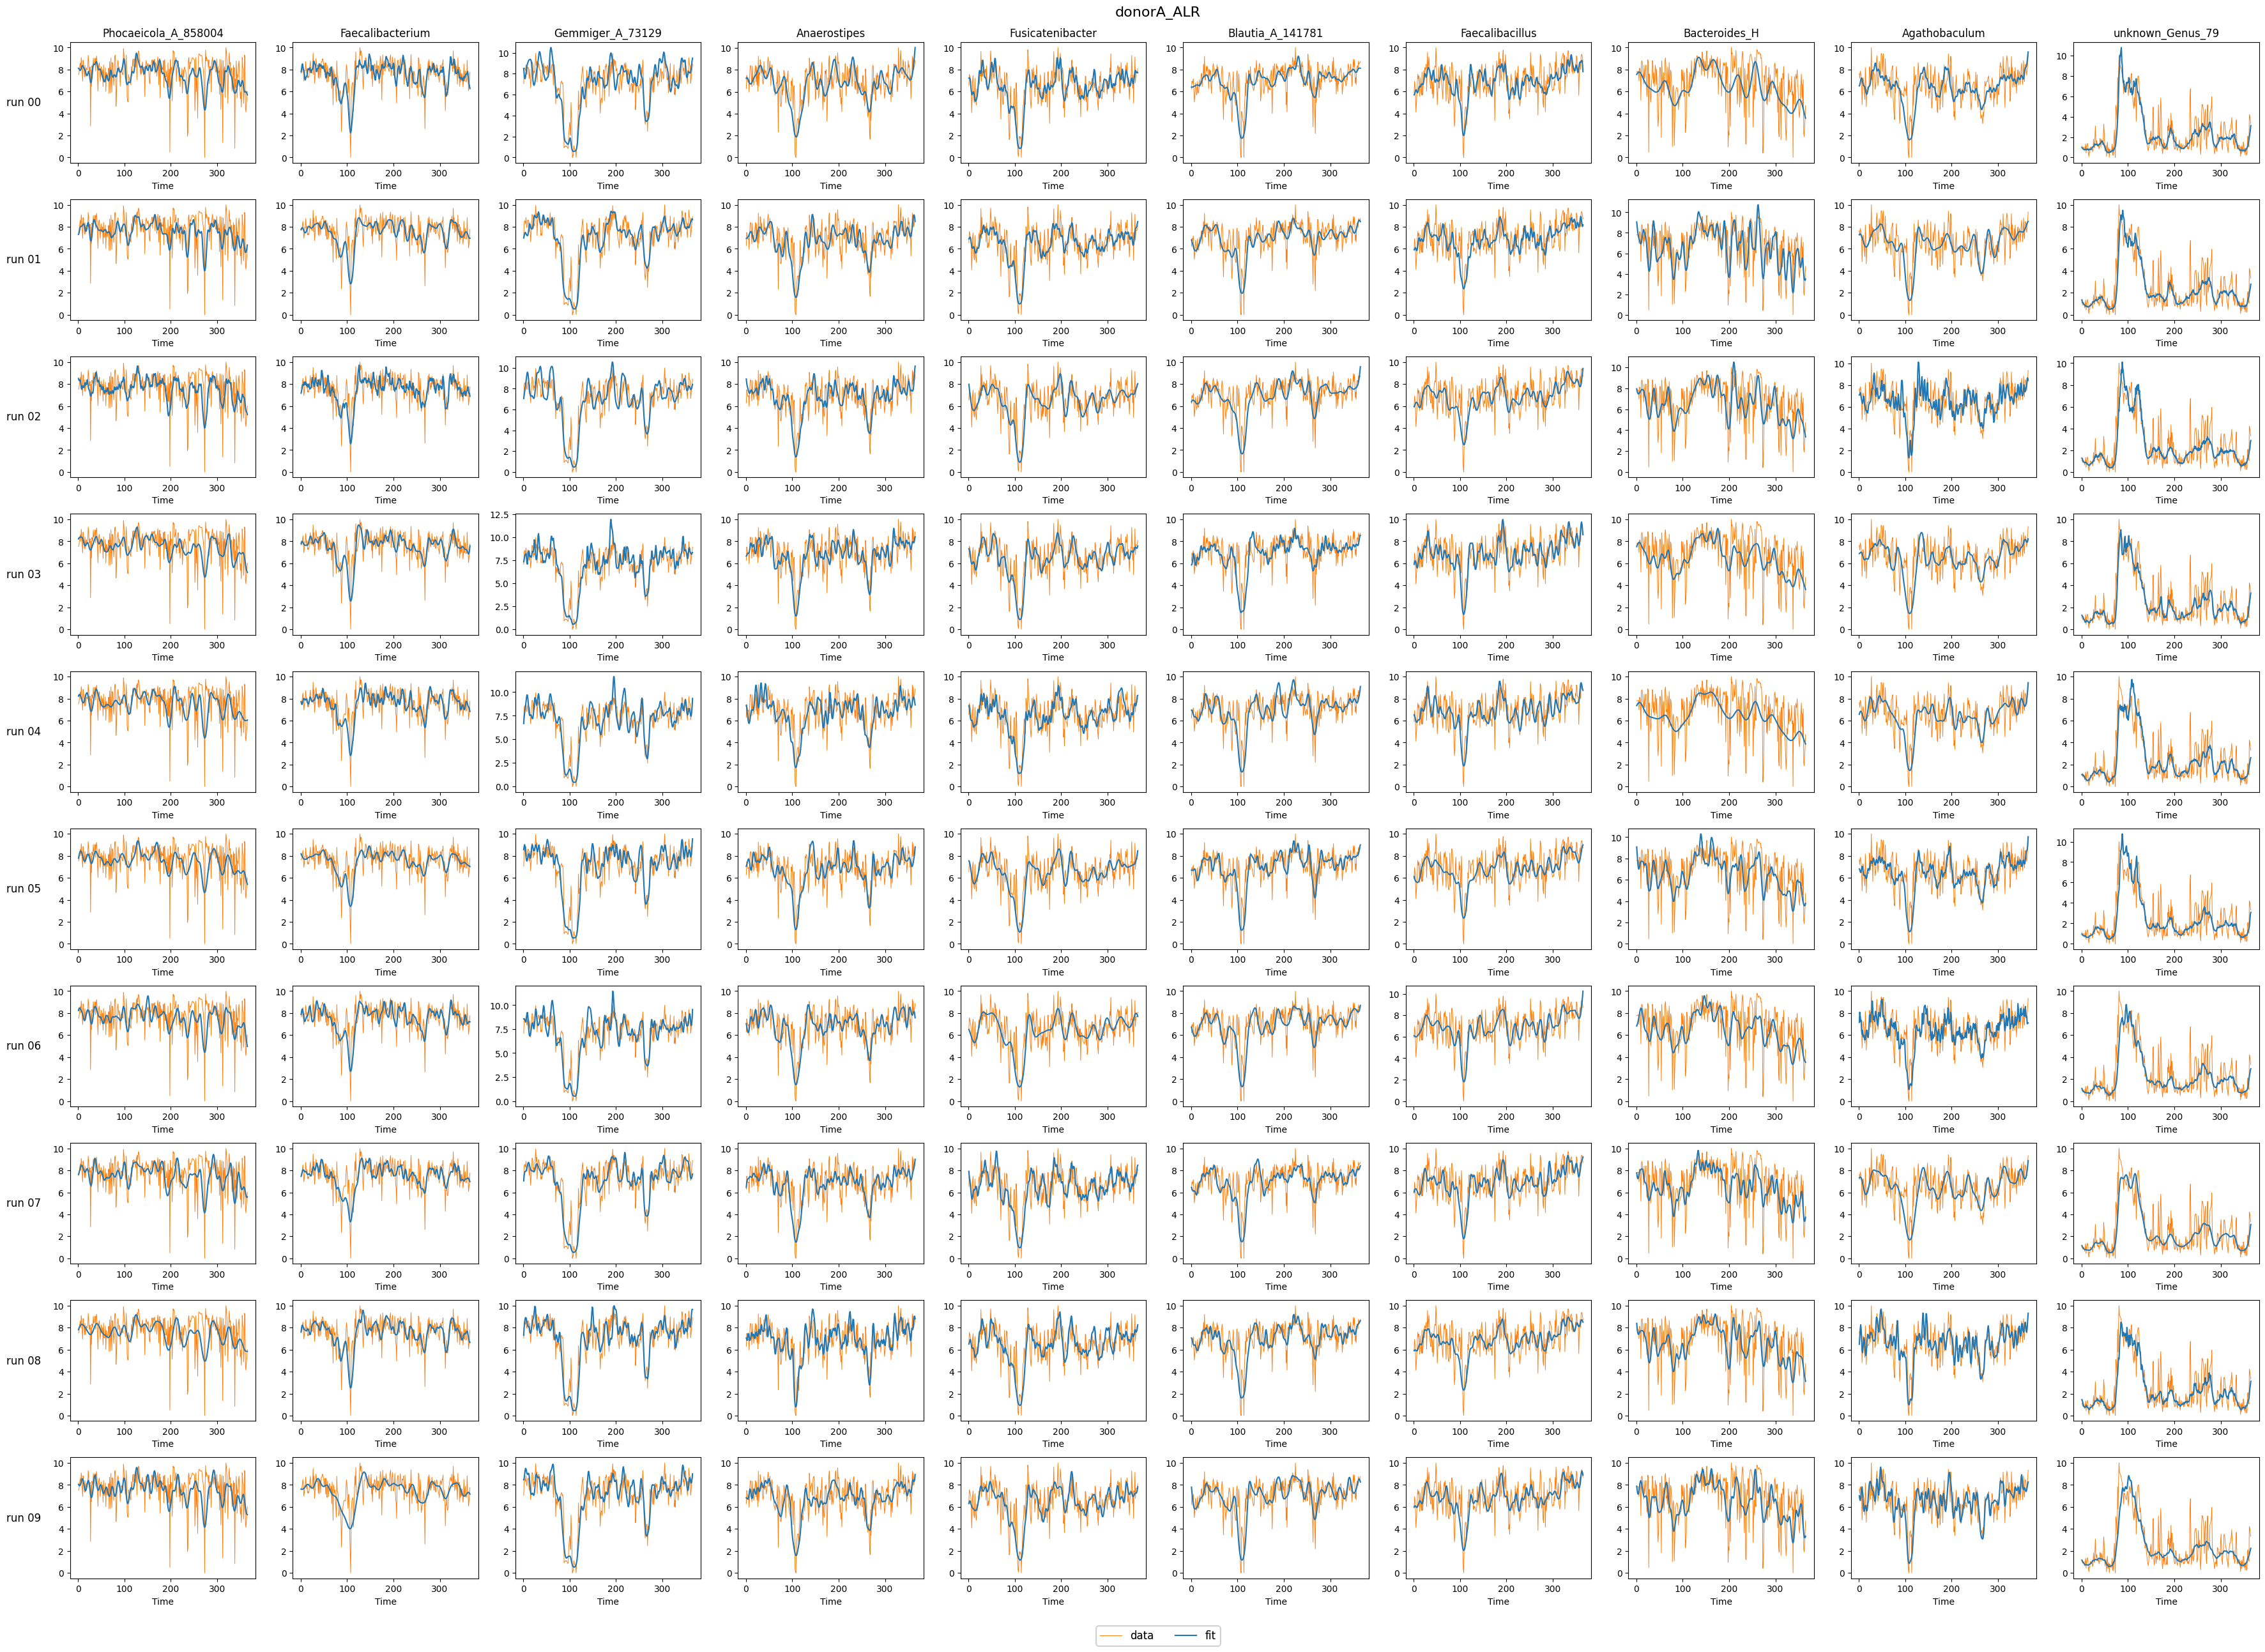

In [8]:
for dataset in datasets:
    # dataset = datasets[0]
    print(dataset)
    out_dir = output_folder + "out_" + dataset + "/"

    # get number of taxa
    df = pd.read_csv(f'{out_dir}/out_{dataset}_run05/Names_xi.csv')
    n_taxa = len(df.index)

    # get list of available runs for the given dataset
    runs = []
    for file in [s for s in os.listdir(out_dir) if dataset in s]:
        m = re.search(r"run(\d{2})", file)
        if m:
            runs.append(m.group(1))

    # specify dimensions of the plot
    n_runs = len(runs)

    # check if runs for these specifications are available
    if n_runs > 0:

        # specify dimensions of the plot
        n_row = n_runs
        n_col = n_taxa

        # make plot
        fig, axs = plt.subplots(n_row, n_col)
        fig.set_figwidth(3.5*n_col)
        fig.set_figheight(2.5*n_row)
        fig.suptitle(dataset, y=1.0, fontsize = 16)
        fig.tight_layout(h_pad = 2)

        y = 0

        for run in runs:
            out_run = out_dir + "out_" + dataset + f"_run{run}"
            
            if os.path.exists(f"{out_run}/Yhat.csv"):
                # read data files
                df_pred = pd.read_csv(f"{out_run}/Yhat.csv", header=[0])
                df_data_obs = pd.read_csv(f"{out_run}/TS_{dataset}.csv", header=[0])

                # convert files to numpy array
                data_obs = np.array(df_data_obs)
                pred = np.array(df_pred)

                for taxon in np.arange(n_taxa):
                    # make plot
                    axs[int(y/n_col), (taxon)].plot(data_obs[:,0], data_obs[:,(taxon+1)], label = "data", linewidth = 0.7, color = colors[1])
                    axs[int(y/n_col), (taxon)].plot(data_obs[:,0], pred[:,(taxon)], label = "fit")
                    axs[int(y/n_col), (taxon)].set_xlabel("Time")
                    # axs[int(y/n_col), (taxon)].set_ylim(-0.5, 12.5)

                    axs[0, (taxon)].set_title(df_data_obs.columns[(taxon+1)])

                    y += 1
                axs[int((y-taxon)/n_col), 0].annotate(f"run {run}", xy=(0, 0.5), 
                                                    xytext=(-axs[int((y-taxon)/n_col), 0].yaxis.labelpad - 5, 0),
                                                    xycoords=axs[int((y-taxon)/n_col), 0].yaxis.label, textcoords='offset points',
                                                    size='large', ha='right', va='center')
                
                # add one legend for all polts (in the lower center)
                handles, labels = axs[0,0].get_legend_handles_labels()
                fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.03),
                            fancybox=True, shadow=False, ncol = 4, fontsize = 12)
                
        # save plots in one file
        plt.savefig(f'{out_dir}/NODEBNGM_{dataset}_prediction_fits.pdf',
                    bbox_inches='tight', dpi = 300)
        plt.close()

# Step 3: Calculate mean over effects

## Mean over all weightsMats

donorA_ALR
donorB_ALR
male_ALR
female_ALR


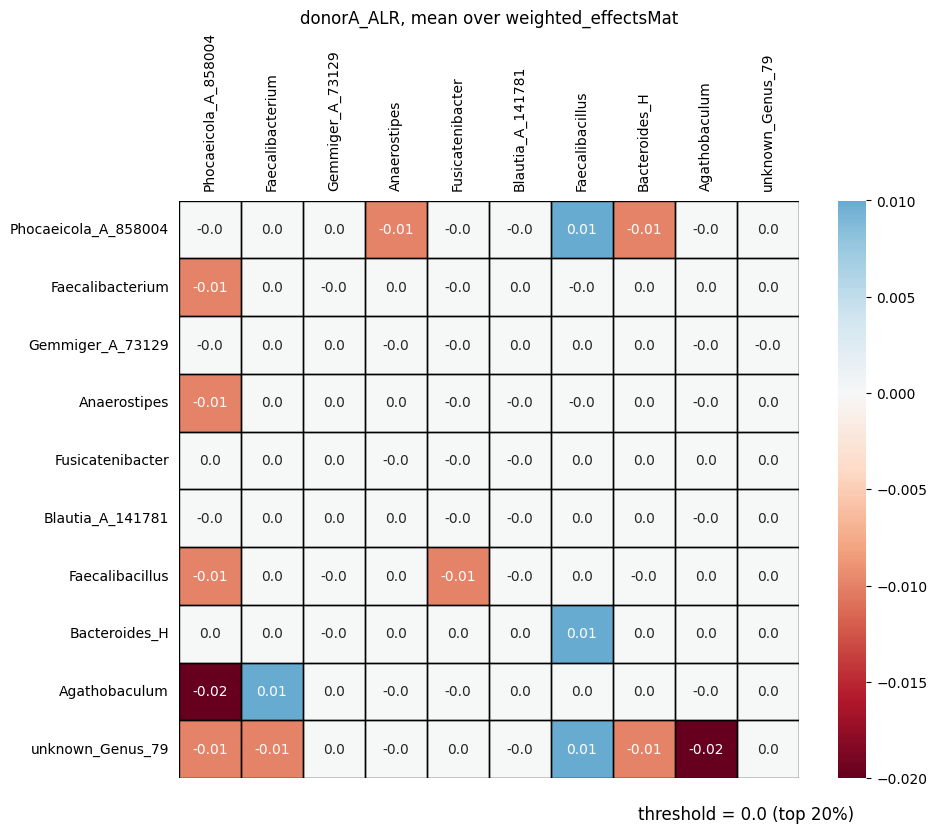

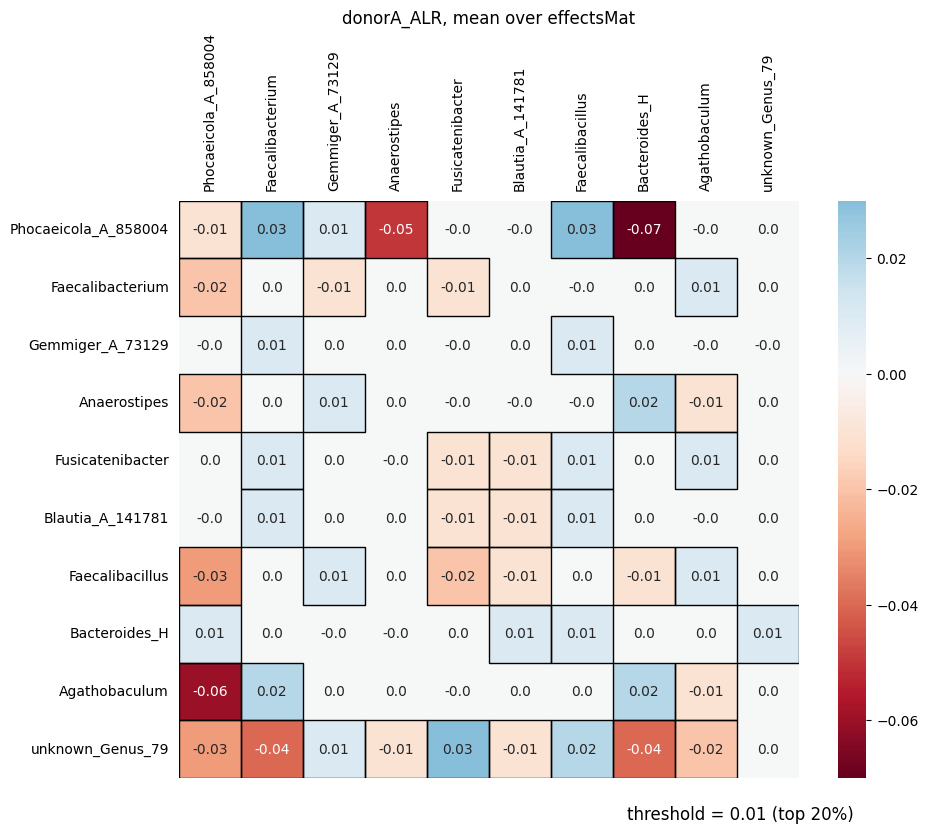

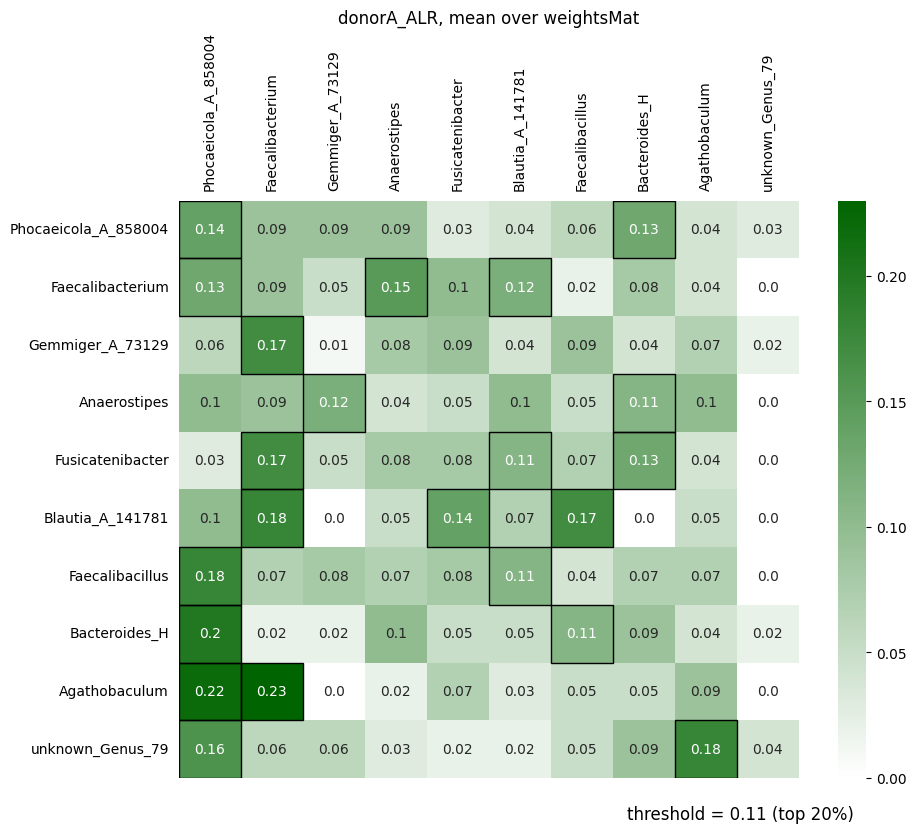

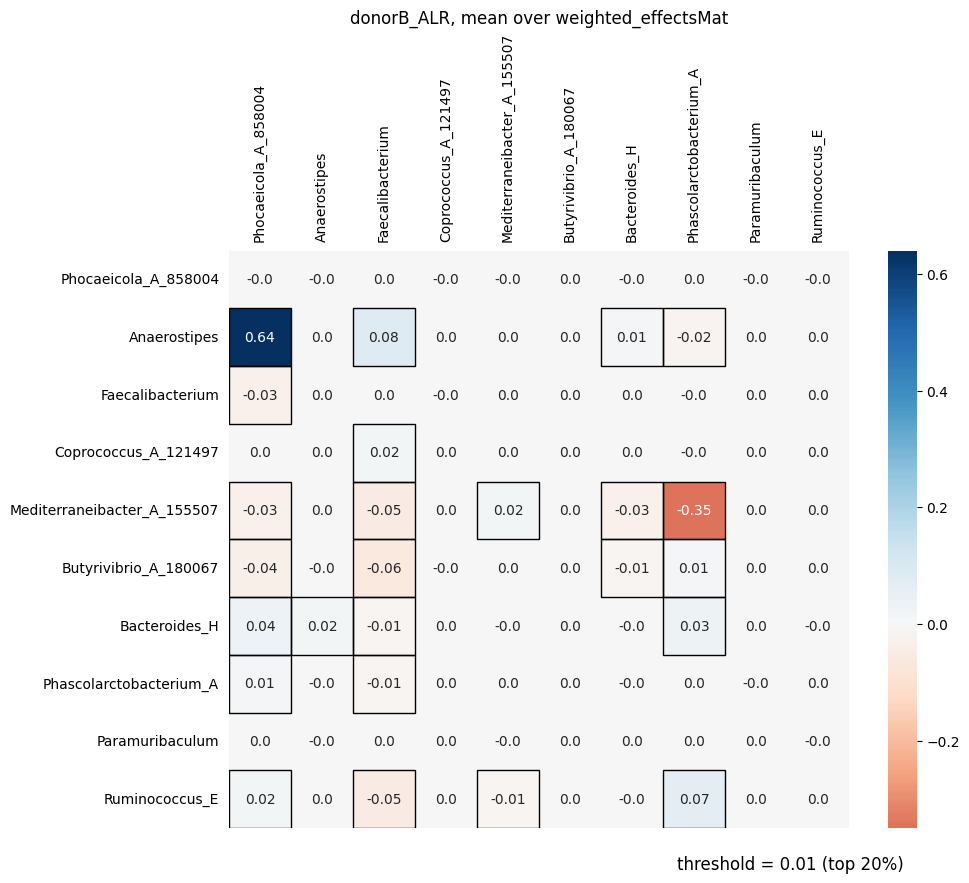

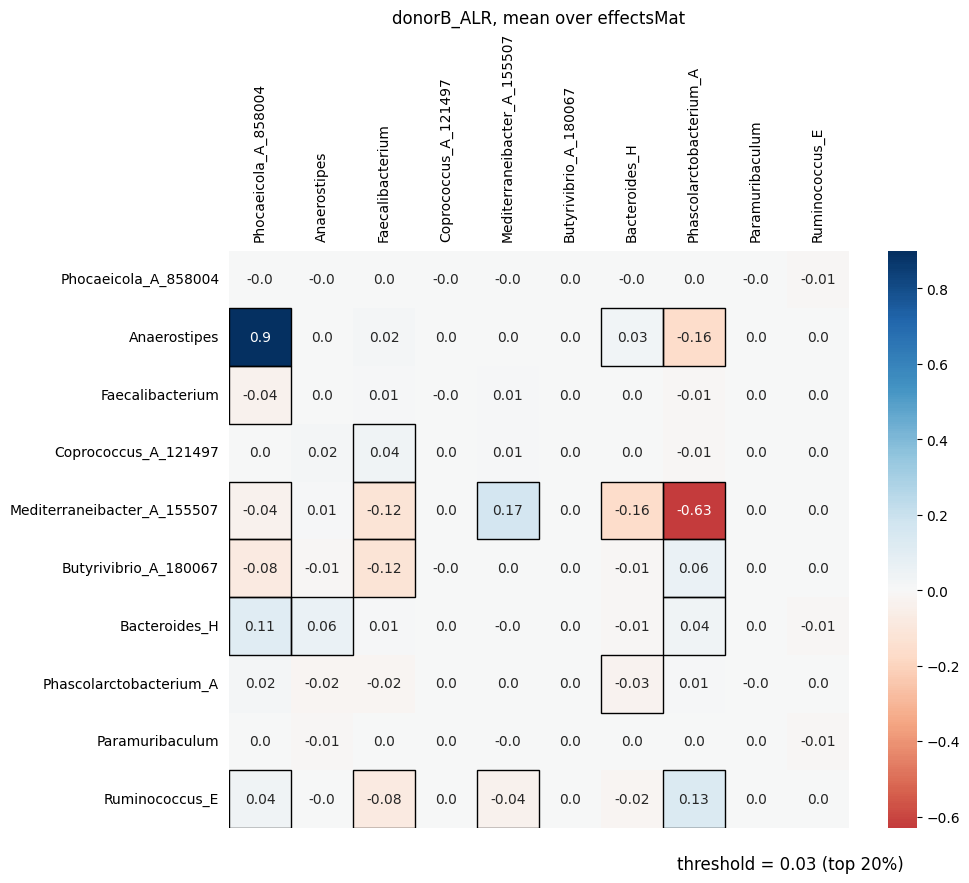

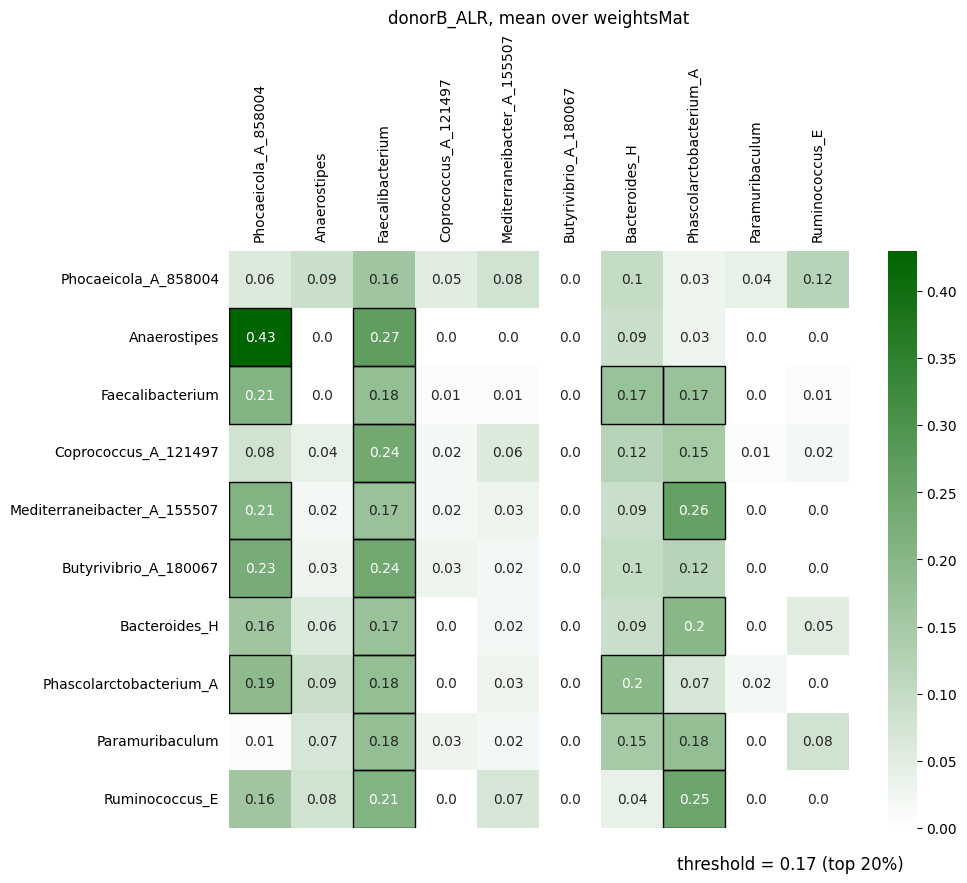

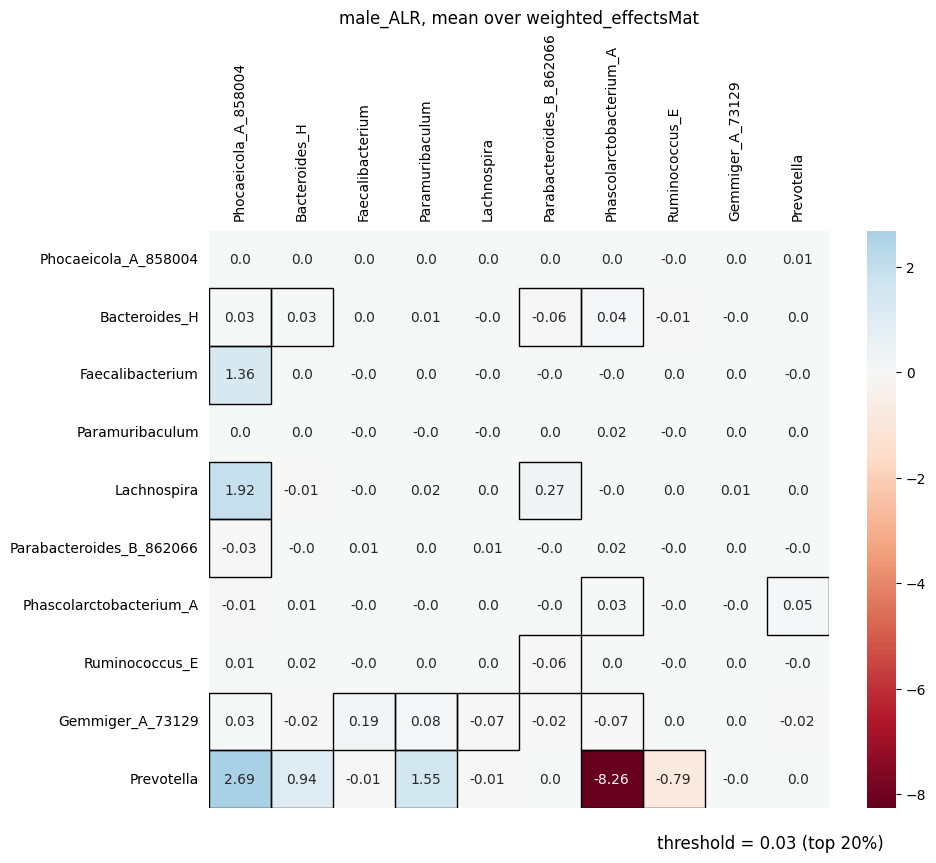

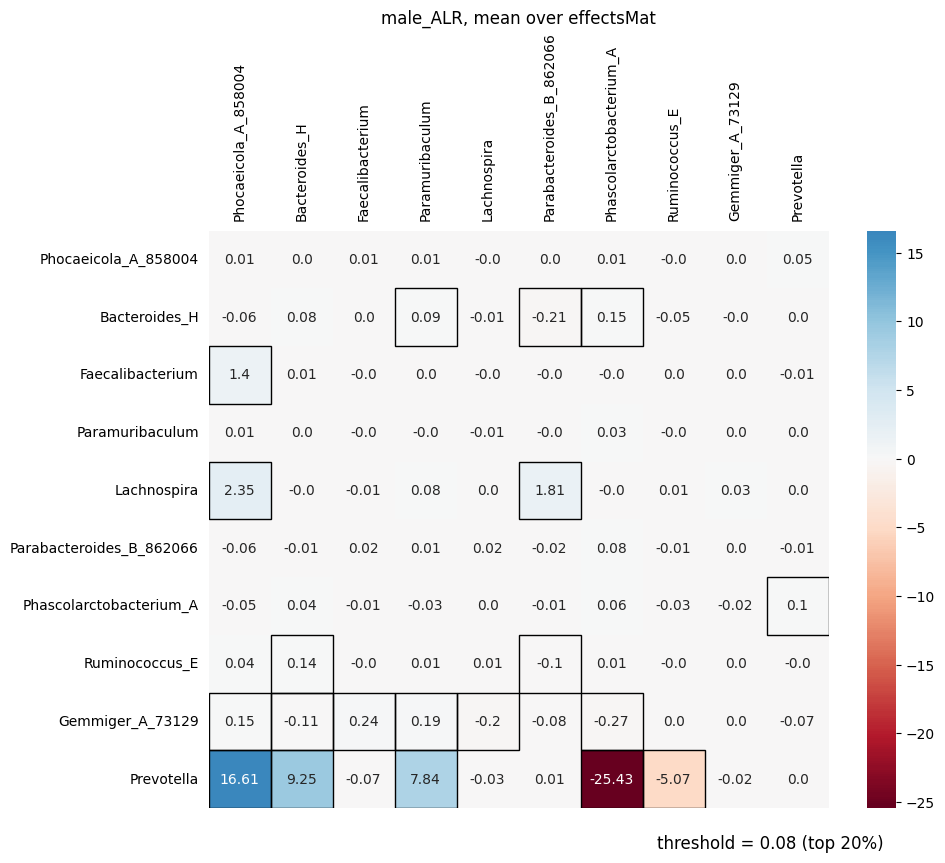

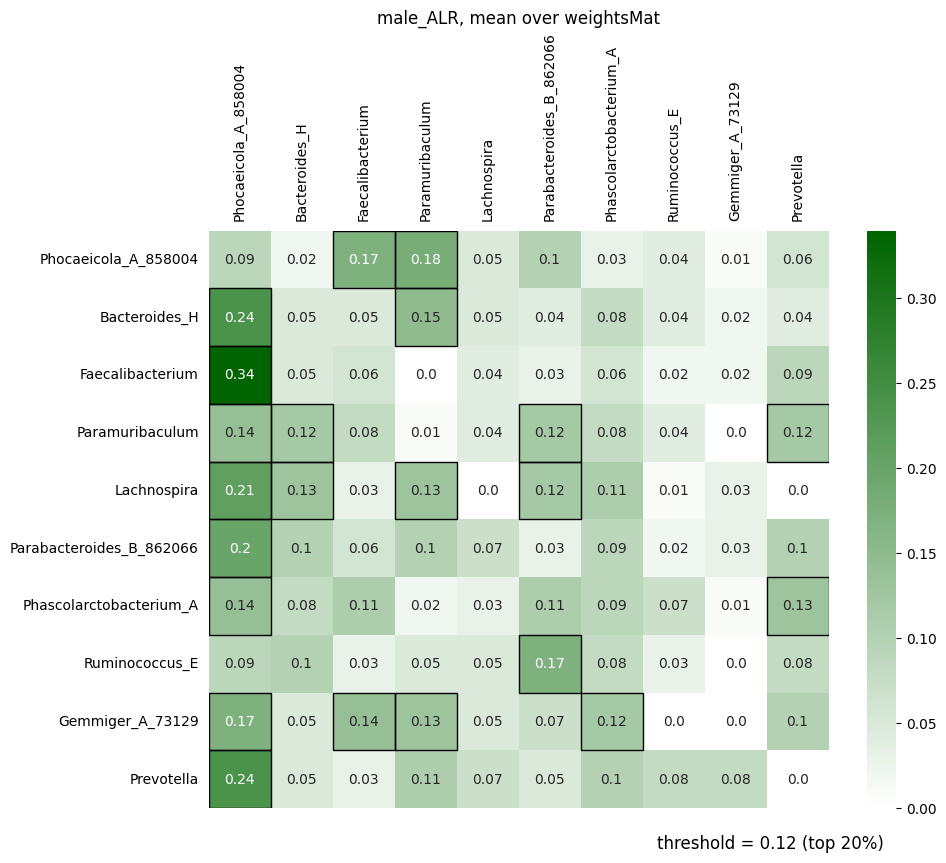

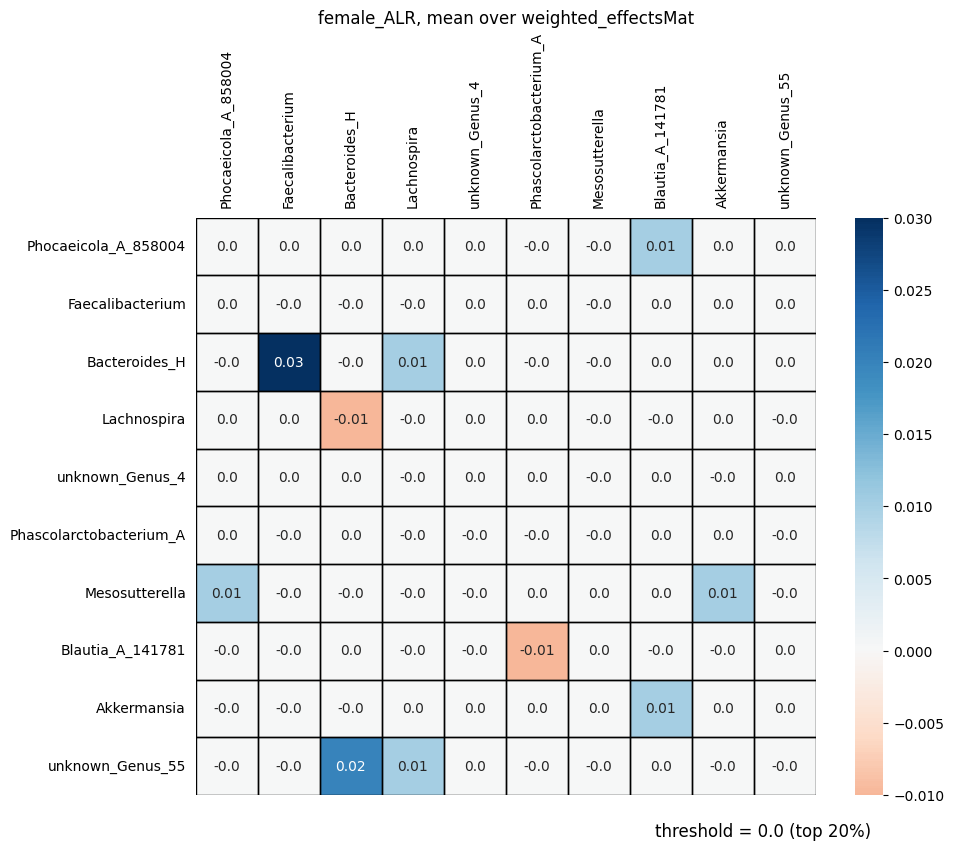

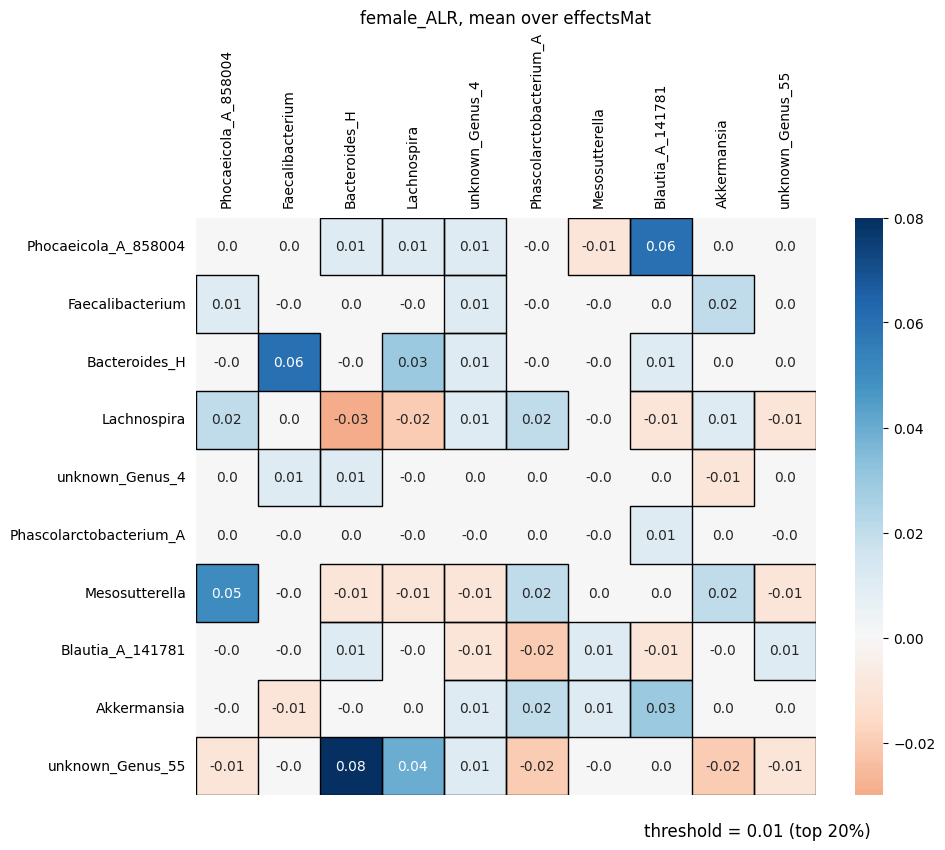

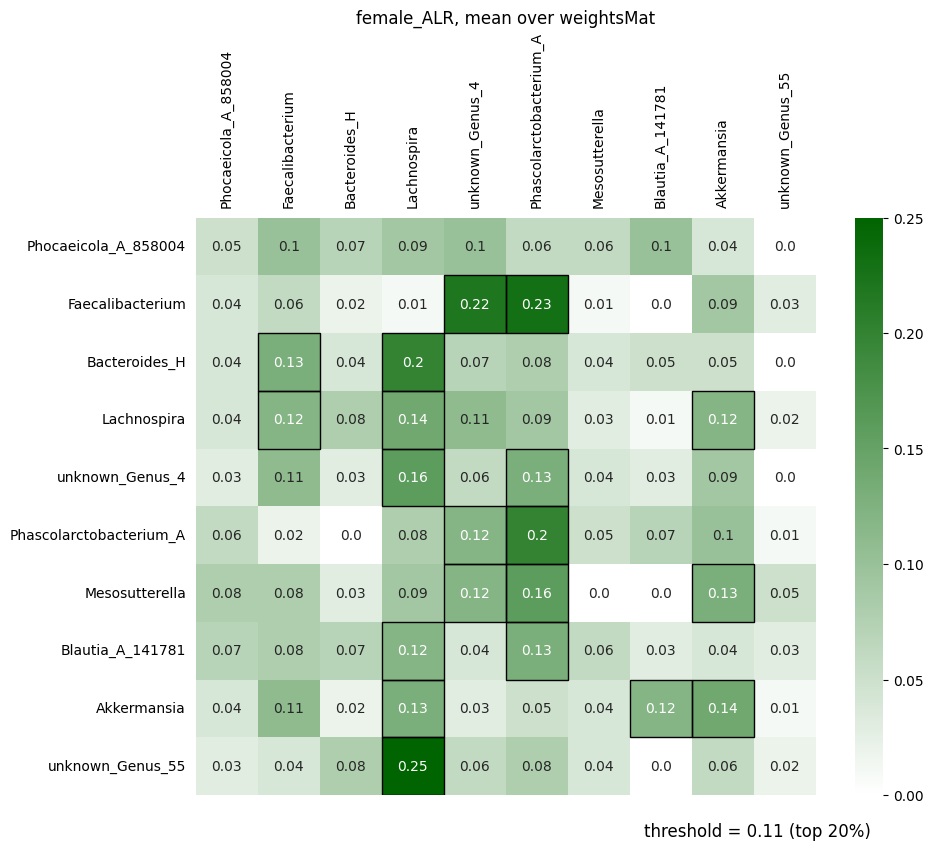

In [9]:
for dataset in datasets:
    # dataset = datasets[1]
    print(dataset)
    for Mat in ["weighted_effectsMat",  "effectsMat", "weightsMat"]: # "effectsMat", "weightsMat"
        # Mat = "weightsMat"

        out_dir = output_folder + "out_" + dataset

        # get number of taxa
        df = pd.read_csv(f'{out_dir}/out_{dataset}_run05/Names_xi.csv')
        n_taxa = len(df.index)

        # get list of available runs for the given dataset
        runs = []
        for file in [s for s in os.listdir(out_dir) if dataset in s and "." not in s]:
            runs.append(file)

        # number of available runs
        n_runs = len(runs)

        # check if runs for these specifications are available
        if n_runs > 0:
            
            df_model_coeffs_all = []
            count = 0

            for run in runs:
                # run_nr = re.search(r"run(\d{2})", run).group(1)
                out_run = out_dir + "/" + run
                if os.path.exists(f"{out_run}/{Mat}.csv"):
                    df_model_coeffs_tmp = pd.read_csv(f"{out_run}/{Mat}.csv", header=[0])
                    # print(df_model_coeffs_tmp)
                    df_model_coeffs_all.append(df_model_coeffs_tmp.to_numpy())
        
        if len(df_model_coeffs_all) > 0:
            # calculate mean over all coeff matrices
            mean_array = np.mean(df_model_coeffs_all, axis=0)
            # and save as csv file
            pd.DataFrame(mean_array).to_csv(f'{out_dir}/{Mat}_mean.csv', index=False)
            
            # make plot
            fig, ax = plt.subplots()
            plot_heatmap(matrix_A = np.around(mean_array, 2), ax = ax, fig=fig,
                        title = f"{dataset}, mean over {Mat}", colnames=df_model_coeffs_tmp.columns,
                        Mat=Mat)
            
            # save plot
            plt.savefig(f'{out_dir}/mean_{Mat}_heatmap.pdf',
                        bbox_inches='tight', dpi = 300)